In [1]:
import pandas as pd
import numpy as np
import binarybeech.binarybeech as bb
import matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.INFO)


Iris dataset
==

In [2]:
df_iris=pd.read_csv("data/iris.csv")

In [3]:
df_iris.columns
X_names=["petal_length","petal_width"]
df_iris[X_names]

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [4]:

c_iris = bb.CART(df_iris,"species",metrics_type="classification")
c_iris.create_tree()


INFO:binarybeech.binarybeech:A tree with 9 leafs was created


In [5]:
c_iris.tree._predict(df_iris.iloc[0]).value

'setosa'

In [6]:
c_iris.tree.root.branches[0].pinfo


{'N': 50, 'r': 0.0, 'R': 0.0}

In [7]:
c_iris.prune()


{'alpha': [0,
  0.0033333333333333327,
  0.004444444444444441,
  0.019999999999999987,
  0.29333333333333333],
 'R': [0.006666666666666665,
  0.019999999999999987,
  0.03999999999999997,
  0.3333333333333333,
  0.6666666666666667],
 'n_leafs': [7, 4, 3, 2, 1]}

In [8]:
c_iris.create_tree()
c_iris.prune(alpha_max = 2e-3)


INFO:binarybeech.binarybeech:A tree with 9 leafs was created


{'alpha': [0], 'R': [0.006666666666666665], 'n_leafs': [7]}

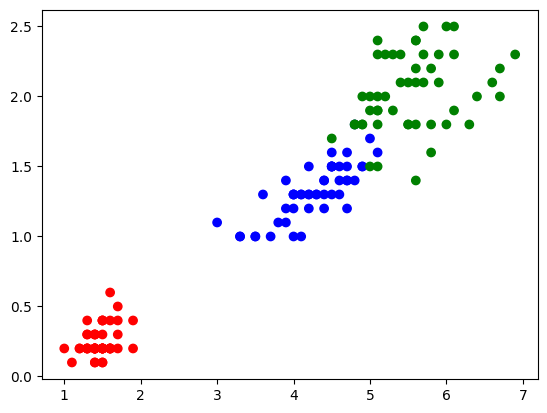

In [9]:
import matplotlib.pyplot as plt
colors = {"setosa":"red", "versicolor":"blue", "virginica":"green"}
plt.scatter(df_iris["petal_length"],df_iris["petal_width"],c=df_iris["species"].map(colors))


In [10]:

x, y = np.meshgrid(np.linspace(1,7,11),np.linspace(0,2.5,11))
col = []
for i in range(len(x.ravel())):
    d = df_iris.iloc[120].copy()
    d["petal_length"] = x.ravel()[i]
    d["petal_width"] = y.ravel()[i]
    col.append(c_iris.tree._predict(d).value)
for i in range(len(col)):
    if col[i] == "setosa":
        col[i] = 0
    if col[i] == "versicolor":
        col[i] = 1
    if col[i] == "virginica":
        col[i] = 2
z = np.array(col).reshape(x.shape)

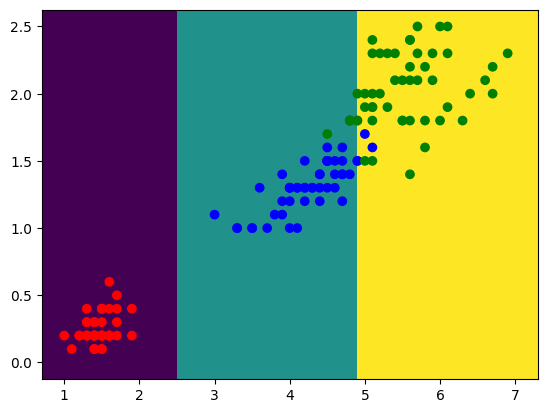

In [11]:
fig, ax = plt.subplots()
ax.pcolormesh(x,y,z)
ax.scatter(df_iris["petal_length"],df_iris["petal_width"],c=df_iris["species"].map(colors))

In [12]:
c_iris.validate()

{'precision': array([1.  , 0.98, 1.  ]),
 'recall': array([1.        , 1.        , 0.98039216]),
 'F-score': 0.9933326665999934,
 'accuracy': 0.9933333333333333}

INFO:binarybeech.binarybeech:A tree with 9 leafs was created
INFO:binarybeech.binarybeech:A tree with 7 leafs was created
/home/jovyan/binarybeech/metrics.py:106: RuntimeWarning: invalid value encountered in true_divide
  return np.diag(m) / np.sum(m, axis=0)
INFO:binarybeech.binarybeech:A tree with 9 leafs was created
INFO:binarybeech.binarybeech:A tree with 8 leafs was created
INFO:binarybeech.binarybeech:A tree with 9 leafs was created
INFO:binarybeech.binarybeech:A tree with 9 leafs was created
INFO:binarybeech.binarybeech:beta_best: 0.003849001794597503
INFO:binarybeech.binarybeech:A tree with 9 leafs was created


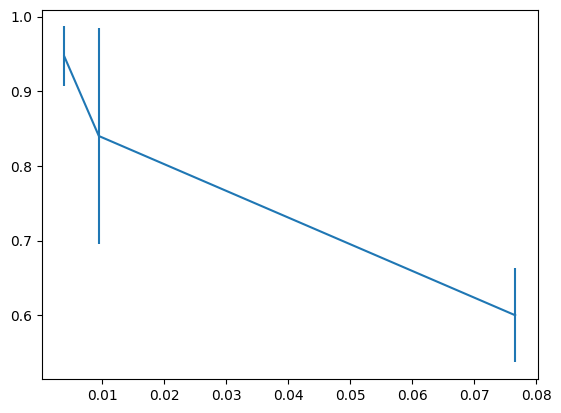

In [13]:
c_iris.train()

In [14]:
c_iris.tree.show()

petal_length<2.39
├── False:petal_width<1.64
│   ├── False:virginica
│   └── True: petal_length<4.94
│       ├── False:virginica
│       └── True: versicolor
└── True: setosa



In [15]:
c_iris.validate()

{'precision': array([1.  , 0.94, 1.  ]),
 'recall': array([1.        , 1.        , 0.94339623]),
 'F-score': 0.9799819837854069,
 'accuracy': 0.98}

# Penguins dataset

In [16]:

df_penguins = pd.read_csv("data/penguins.csv")
df_penguins.columns

Index(['rowid', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [17]:
df_penguins

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [18]:

c_penguins = bb.CART(df_penguins,"species",["island","bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g","sex"],metrics_type="classification")

In [19]:
c_penguins.create_tree()

INFO:binarybeech.binarybeech:A tree with 13 leafs was created


In [20]:
c_penguins.validate()

{'precision': array([1., 1., 1.]),
 'recall': array([1., 1., 1.]),
 'F-score': 1.0,
 'accuracy': 1.0}

In [21]:
c_penguins.prune()


{'alpha': [0,
  0.001453488372093023,
  0.0014534883720930297,
  0.0029069767441860465,
  0.007267441860465099,
  0.00872093023255814,
  0.008720930232558143,
  0.023255813953488393,
  0.1482558139534884],
 'R': [0.002906976744186046,
  0.005813953488372105,
  0.008720930232558152,
  0.02325581395348835,
  0.03197674418604649,
  0.04069767441860463,
  0.06395348837209303,
  0.21220930232558144,
  0.5581395348837209],
 'n_leafs': [11, 9, 8, 6, 5, 4, 3, 2, 1]}

In [22]:
c_penguins.create_tree()
c_penguins.prune(alpha_max=5e-3)

INFO:binarybeech.binarybeech:A tree with 13 leafs was created


{'alpha': [0,
  0.001453488372093023,
  0.0014534883720930297,
  0.0029069767441860465],
 'R': [0.002906976744186046,
  0.005813953488372105,
  0.008720930232558152,
  0.02325581395348835],
 'n_leafs': [11, 9, 8, 6]}

INFO:binarybeech.binarybeech:A tree with 13 leafs was created
INFO:binarybeech.binarybeech:A tree with 13 leafs was created
/home/jovyan/binarybeech/metrics.py:106: RuntimeWarning: invalid value encountered in true_divide
  return np.diag(m) / np.sum(m, axis=0)
INFO:binarybeech.binarybeech:A tree with 11 leafs was created
INFO:binarybeech.binarybeech:A tree with 11 leafs was created
INFO:binarybeech.binarybeech:A tree with 12 leafs was created
INFO:binarybeech.binarybeech:A tree with 12 leafs was created
INFO:binarybeech.binarybeech:beta_best: 0.004596333808384267
INFO:binarybeech.binarybeech:A tree with 13 leafs was created


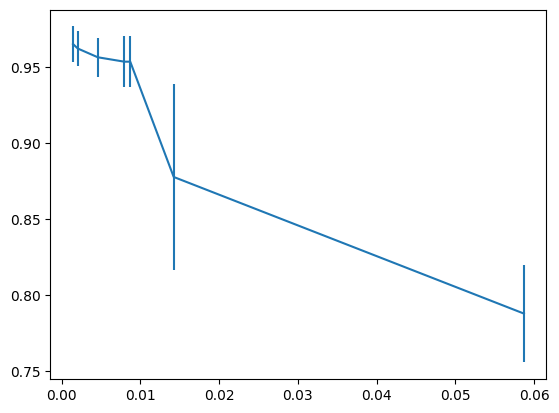

In [23]:
c_penguins.train()

In [24]:
c_penguins.tree.show()

flipper_length_mm<204.81
├── False:island in ('Biscoe',)
│   ├── False:bill_length_mm<44.34
│   │   ├── False:Chinstrap
│   │   └── True: Adelie
│   └── True: Gentoo
└── True: bill_length_mm<44.29
    ├── False:island in ('Dream',)
    │   ├── False:Adelie
    │   └── True: Chinstrap
    └── True: Adelie



In [25]:
c_penguins.validate()

{'precision': array([1.        , 0.91176471, 0.98387097]),
 'recall': array([0.95, 1.  , 1.  ]),
 'F-score': 0.9733583489681051,
 'accuracy': 0.9767441860465116}